<a href="https://colab.research.google.com/github/Redhatt/MS-ML/blob/main/Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!git clone https://github.com/Redhatt/MS-ML
!ls -l

Cloning into 'MS-ML'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 11 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (11/11), done.
total 8
drwxr-xr-x 4 root root 4096 Apr 14 04:03 MS-ML
drwxr-xr-x 1 root root 4096 Apr  7 13:36 sample_data


In [4]:
! python -m pip install numpy scipy matplotlib tensorflow keras keras-visualizer pandas

In [43]:
# importing modules and libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from keras import initializers
from keras.layers import Dense
from keras.models import Sequential
from keras import optimizers
# from keras_visualizer import visualizer
import matplotlib.pyplot as plt
import sys
import os
import seaborn as sb

In [44]:
# loading data files
file1 = 'MS-ML/superconduct/train.csv'
file2 = 'MS-ML/superconduct/unique_m.csv'

In [55]:
# making parameter data frame and composition data frame

df_para_ = pd.read_csv(file1)
para = df_para_.columns.tolist()
# for k, i in enumerate(para,1):
#   print(f"{k}. {i}")

df_comp_ = pd.read_csv(file2)
comp = df_comp_.columns.tolist()
# for k, i in enumerate(comp,1):
#   print(f"{k}. {i}")

print('df_para_ size:', len(df_para_.columns), 'x', len(df_para_[df_para_.columns.tolist()[0]]))
print('df_comp_ size:', len(df_comp_.columns), 'x', len(df_comp_[df_comp_.columns.tolist()[0]]))

df_para_ size: 82 x 21263
df_comp_ size: 88 x 21263


In [46]:
# reducing data size 
top = 21263
df_para_ = df_para_.head(top)
df_comp_ = df_comp_.head(top)

In [47]:
# droping prediction parameter i.e. critical temperature
# also dropping matarial parameter from df_comp 

pred_para = 'critical_temp'

exclude_from_para = ['critical_temp']
exclude_from_comp = ['critical_temp', 'material']

temp = df_para_[pred_para].tolist()

df_para = df_para_.drop(exclude_from_para, axis=1)
df_comp = df_comp_.drop(exclude_from_comp, axis=1)

In [48]:
# converting data into numpy array from list, for better mathematical operations
temp = np.asarray(temp, dtype=np.float64)

data_para = []
for col in df_para:
  data_para.append(df_para[col].tolist()[:])
data_para = np.asarray(data_para, dtype=np.float64).T

data_comp = []
for col in df_comp:
  data_comp.append(df_comp[col].tolist()[:])
data_comp = np.asarray(data_comp, dtype=np.float64).T

print(f"shape of data_para: {data_para.shape}")
print(f"shape of data_comp: {data_comp.shape}")


shape of data_para: (21263, 81)
shape of data_comp: (21263, 86)


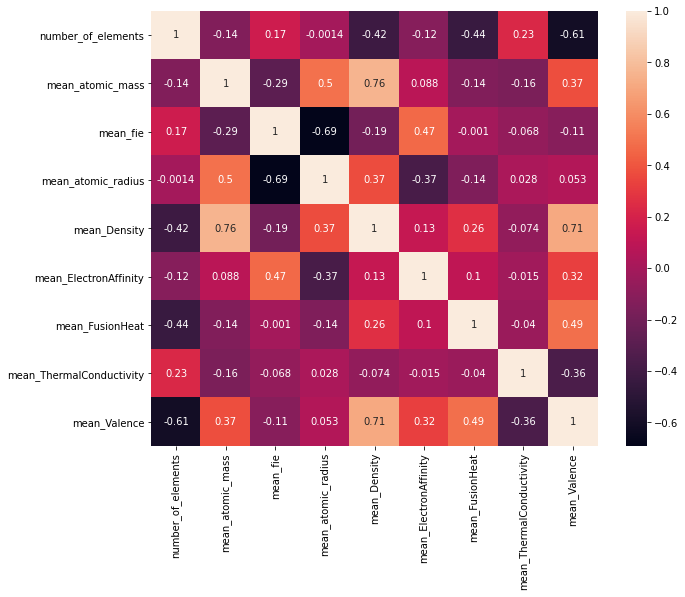

In [64]:
mean_para = ['number_of_elements',
              'mean_atomic_mass',
              'mean_fie',
              'mean_atomic_radius',
              'mean_Density',
              'mean_ElectronAffinity',
              'mean_FusionHeat',
              'mean_ThermalConductivity',
              'mean_Valence']

df_para_mean = df_para[mean_para]
corre = df_para_mean.corr()
figure = plt.figure()
figure.set_size_inches(10, 8)

sb.heatmap(corre, xticklabels=corre.columns, yticklabels=corre.columns, annot=True)

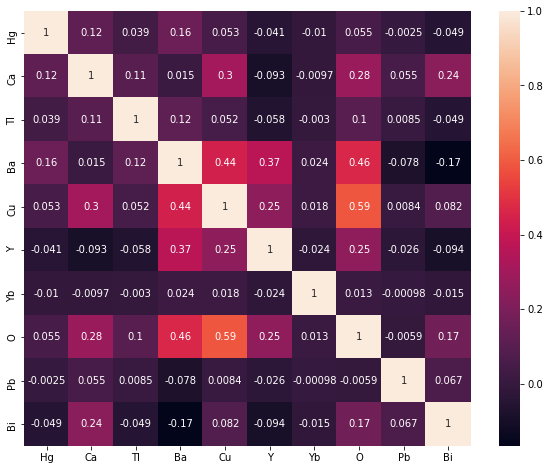

In [65]:
most_comp = ['Hg', 'Ca', 'Tl', 'Ba', 'Cu', 'Y', 'Yb', 'O', 'Pb', 'Bi']
df_comp_mean = df_comp[most_comp]
corre = df_comp_mean.corr()

figure = plt.figure()
figure.set_size_inches(10, 8)
sb.heatmap(corre, xticklabels=corre.columns, yticklabels=corre.columns, annot=True)

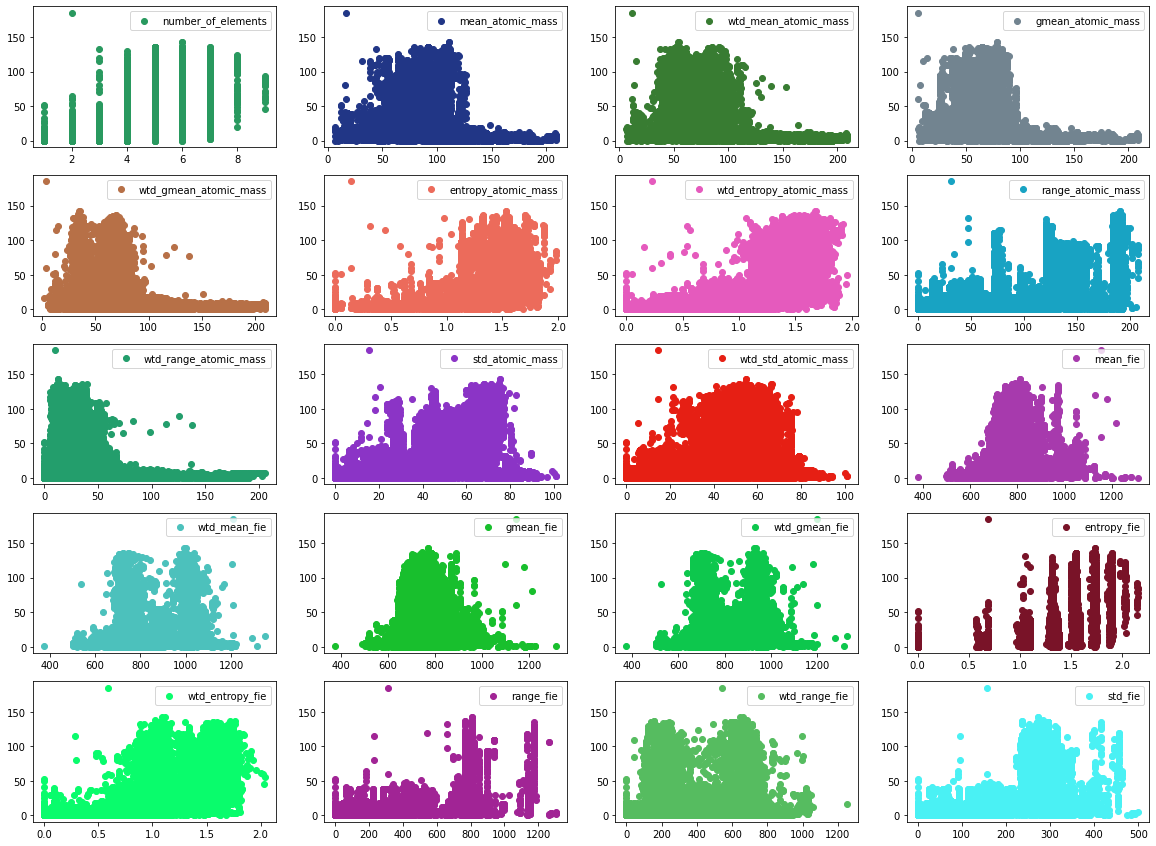

In [37]:
# ploting data 
# playing and looking for some relation among different parameters againest temp
def get_factors(a):
  if a>15:return a//4 + 1*(a%4 != 0), 4
  if a>8: return a//3 + 1*(a%3 != 0), 3
  if a>4: return a//2 + 1*(a%2 != 0), 2
  return a, 1


figure = plt.figure()
figure.set_size_inches(20, 15)

y_labels = pred_para
x_labels = para
xl_size = len(x_labels)

xl_size = min(20, xl_size)

row_count,col_count = get_factors(xl_size)

for i in range(row_count):
  for j in range(col_count):
    if col_count*i + j >= xl_size:
      break
    label = x_labels[col_count*i + j]
    plt.subplot2grid((row_count, col_count), (i,j))
    plt.scatter(df_para[label],temp, label=label, color=np.random.rand(3,))
    plt.legend(loc='upper right')

  if col_count*i + j >= xl_size:
      break
plt.show()

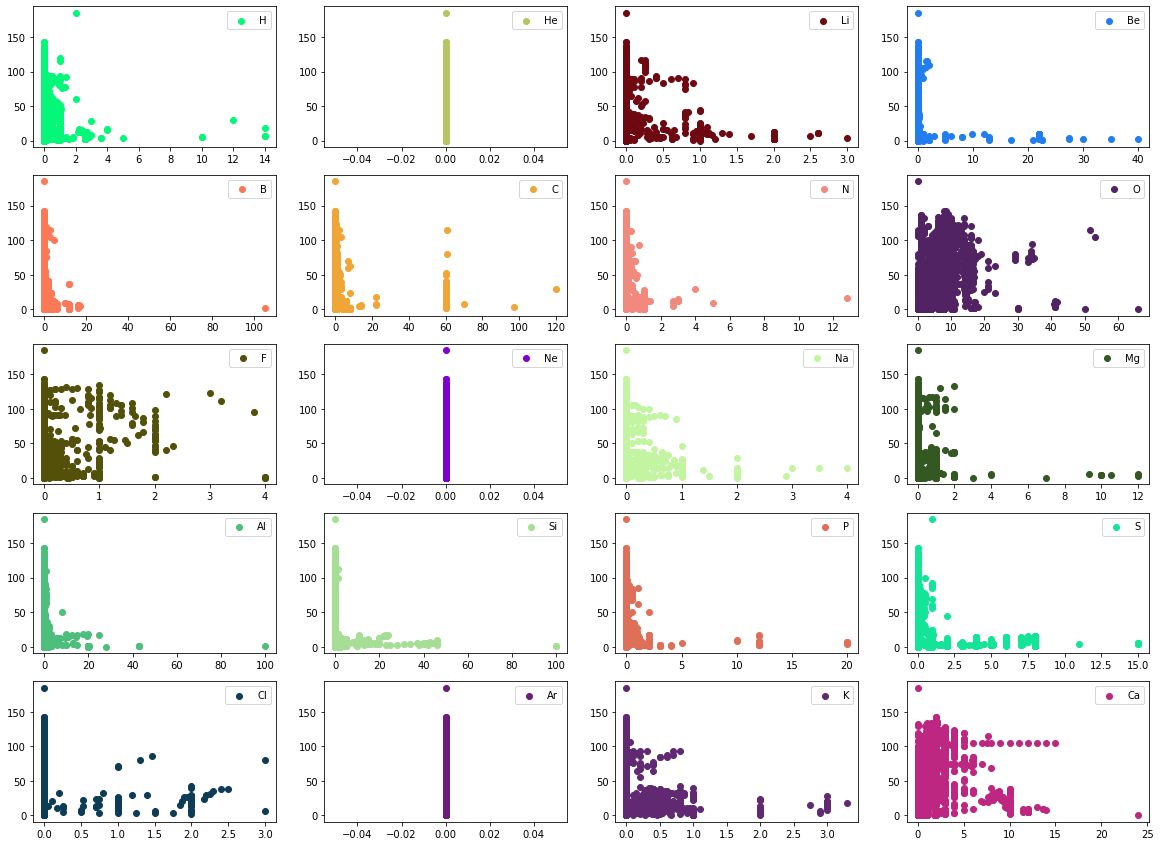

In [38]:
figure = plt.figure()

y_labels = pred_para
x_labels = comp
xl_size = len(x_labels)

figure.set_size_inches(20, 15)
xl_size = min(20, xl_size)

row_count,col_count = get_factors(xl_size)

for i in range(row_count):
  for j in range(col_count):
    if col_count*i + j >= xl_size:
      break
    label = x_labels[col_count*i + j]
    plt.subplot2grid((row_count, col_count), (i,j))
    plt.scatter(df_comp[label],temp, label=label, color=np.random.rand(3,))
    plt.legend(loc='upper right')

  if col_count*i + j >= xl_size:
      break
plt.show()

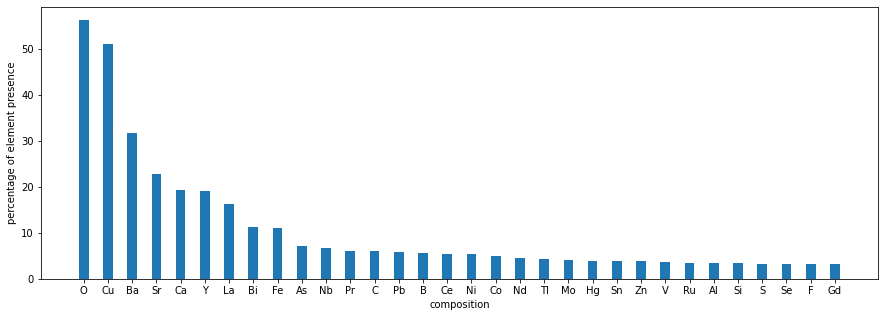

In [39]:
# element proportion graph

figure = plt.figure()
figure.set_size_inches(15, 5)

size = 32

y_label = "percentage of element presence"
x_label = comp[:]

values =[np.sum(x>0, axis=0)/float(x.shape[0]) for x in data_comp.T]
values, x_label = zip(*sorted(zip(values, x_label), reverse=True, key=lambda x:x[0]))
values = 100.0 * np.asarray(values)

plt.xlabel('composition')
plt.ylabel(y_label)
plt.bar(x_label[:size], values[:size], width=0.4)
plt.show()

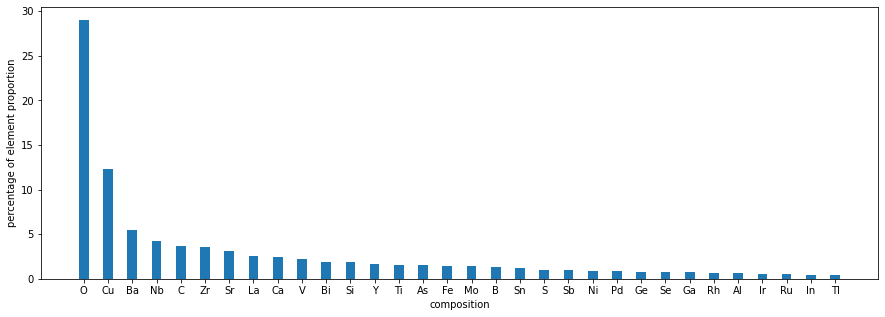

In [40]:
# element proportion graph

figure = plt.figure()
figure.set_size_inches(15, 5)

y_label = "percentage of element proportion"
x_label = comp[:]
amount = np.array([np.sum(x) for x in data_comp.T])
amount = amount/amount.sum()

amount, x_label = zip(*sorted(zip(amount, x_label), reverse=True, key=lambda x:x[0]))
amount = 100.0 * np.asarray(amount)

plt.xlabel('composition')
plt.ylabel(y_label)
# plt.subplot(122)
plt.bar(x_label[:size], amount[:size], width=0.4)
plt.show()

In [41]:
# mean critical temperature as per element

avg_temp = [0]*len(comp)
count    = [1]*len(comp)

for k, row in enumerate(data_comp):
  norm = sum(row)
  for i, val in enumerate(row):
    if val>0:
      avg_temp[i] += temp[k]
      count[i] += 1

avg_temp = np.asarray(avg_temp, dtype=np.float32)
count = np.asarray(count, dtype=np.float32)
avg_temp /= count
# avg_temp[avg_temp == 'nan'] = 0  

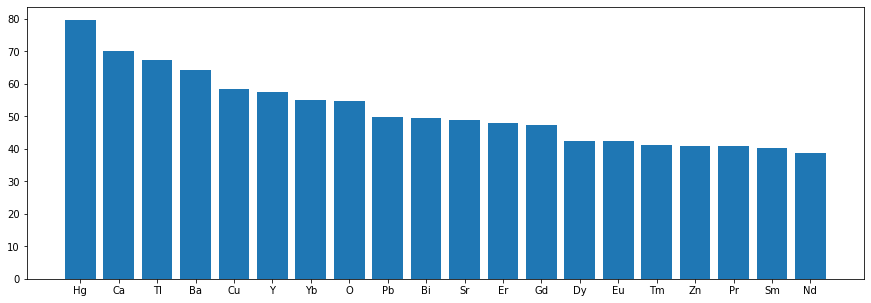

In [42]:
figure = plt.figure()
figure.set_size_inches(15, 5)

new_comp = []
new_avg_temp = []
for i in range(avg_temp.shape[0]):
  if avg_temp[i] != 'nan':
    new_avg_temp.append(avg_temp[i])
    new_comp.append(comp[i])

new_avg_temp, new_comp = zip(*sorted(zip(new_avg_temp, new_comp), reverse=1))

size = 20
plt.bar(new_comp[:size], new_avg_temp[:size])
plt.show()

In [57]:
print(new_comp[:10])

('Hg', 'Ca', 'Tl', 'Ba', 'Cu', 'Y', 'Yb', 'O', 'Pb', 'Bi')
